## A. Build a baseline model

### Concrete Data:

For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

Cement  
Blast Furnace Slag  
Fly Ash  
Water  
Superplasticizer  
Coarse Aggregate  
Fine Aggregate  

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import sklearn 
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot

url = 'https://cocl.us/concrete_data'

data = pd.read_csv(url, delimiter=',')

labels=data['Strength']
features = data.iloc[:,0:8]


Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

### 1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
print(X_train.shape), 
print(X_test.shape), 
print(y_train.shape), 
print(y_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


### 2. Train the model on the training data using 50 epochs.

First let's define the model  
Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

In [4]:
def classification_model():

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(8,)))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
    return model

In [5]:
model=classification_model()

history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)


Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: -5.5526e+02 - mean_squared_error: 42744.8782 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 2/50
 - 0s - loss: -5.5526e+02 - mean_squared_error: 42744.8777 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 3/50
 - 0s - loss: -5.5526e+02 - mean_squared_error: 42744.8783 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 4/50
 - 0s - loss: -5.5526e+02 - mean_squared_error: 42744.8781 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 5/50
 - 0s - loss: -5.5526e+02 - mean_squared_error: 42744.8774 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 6/50
 - 0s - loss: -5.5526e+02 - mean_squared_error: 42744.8778 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 7/50
 - 0s - loss: -5.5526e+02 - mean_squared_error: 42744.8780 - val_loss: -5.5037e+02 - val_mean_squared_error: 44046.0274
Epoch 8/50
 - 0s - loss: -5.5526e+02 

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.



['loss', 'mean_squared_error']
[-550.3739460077873, 44046.0274322411]


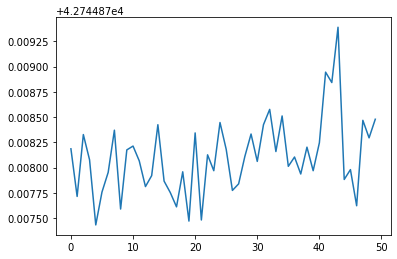

In [6]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(scores)

pyplot.plot(history.history['mean_squared_error'])
pyplot.show()

In [7]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))    

Accuracy: 44046.0274322411% 
 Error: -44045.0274322411


4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.



In [ ]:
data = []

for i in range(0, 50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
    scores = model.evaluate(X_test, y_test, verbose=0)
    data.append(scores)

df = pd.DataFrame(data)

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1492 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 2/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1496 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 3/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1497 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 4/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1488 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 5/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1497 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 6/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1496 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 7/50
 - 0s - loss: -5.4696e+02 - mean_squared_error: 43682.1493 - val_loss: -5.6974e+02 - val_mean_squared_error: 41859.0619
Epoch 8/50
 - 0s - loss: -5.4696e+02 

In [23]:
df= df.rename(columns={0: 'Loss', 1: 'Mean Squared Error'})
df

,Loss,Mean Squared Error
0,-6.042460,0.661684
1,-5.783923,0.704436
2,-5.677698,0.773758
3,-5.926085,0.707782
4,-6.149684,0.653035
5,-6.370301,0.618759
6,-6.156119,0.645216
7,-7.014262,0.562436
8,-6.326328,0.608687
9,-7.231576,0.567177


5. Report the mean and the standard deviation of the mean squared errors.

In [24]:
print(df['Mean Squared Error'].mean())

0.7837384774586531


In [25]:
print(df['Mean Squared Error'].std())

0.21018501131677333


## B. Normalize the data 

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [26]:
data = []
#computer crash with 50
for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train=(X_train-X_train.mean())/X_train.std()
    X_test=(X_test-X_test.mean())/X_test.std()
    y_train=(y_train-y_train.mean())/y_train.std()
    y_test=(y_test-y_test.mean())/y_test.std()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
    scores = model.evaluate(X_test, y_test, verbose=0)
    data.append(scores)

df = pd.DataFrame(data)

Train on 721 samples, validate on 309 samples
Epoch 1/10
 - 0s - loss: -7.3158e+00 - mean_squared_error: 0.8863 - val_loss: -7.4275e+00 - val_mean_squared_error: 0.9431
Epoch 2/10
 - 0s - loss: -7.3339e+00 - mean_squared_error: 0.8947 - val_loss: -7.4021e+00 - val_mean_squared_error: 0.9468
Epoch 3/10
 - 0s - loss: -7.3407e+00 - mean_squared_error: 0.8904 - val_loss: -7.4287e+00 - val_mean_squared_error: 0.9373
Epoch 4/10
 - 0s - loss: -7.3361e+00 - mean_squared_error: 0.8799 - val_loss: -7.4128e+00 - val_mean_squared_error: 0.9304
Epoch 5/10
 - 0s - loss: -7.3627e+00 - mean_squared_error: 0.8399 - val_loss: -7.4226e+00 - val_mean_squared_error: 0.8701
Epoch 6/10
 - 0s - loss: -7.4157e+00 - mean_squared_error: 0.8203 - val_loss: -7.3106e+00 - val_mean_squared_error: 0.8883
Epoch 7/10
 - 0s - loss: -7.4062e+00 - mean_squared_error: 0.8307 - val_loss: -7.3099e+00 - val_mean_squared_error: 0.8896
Epoch 8/10
 - 0s - loss: -7.4127e+00 - mean_squared_error: 0.8269 - val_loss: -7.3157e+00 - v

In [27]:
df= df.rename(columns={0: 'Loss', 1: 'Mean Squared Error'})
df

,Loss,Mean Squared Error
0,-7.400893,0.877225
1,-7.339049,0.698962
2,-7.397664,0.794610
3,-7.306345,0.892441
4,-7.330232,0.902230
5,-7.009380,0.910993
6,-7.447475,1.394227
7,-5.174790,1.871194
8,-6.943894,1.025897
9,-7.115740,0.959385


In [28]:
print(df['Mean Squared Error'].mean())
print(df['Mean Squared Error'].std())

1.0327163324290494
0.34688180794135803


## C. Increate the number of epochs
  
Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [29]:
data = []

for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train=(X_train-X_train.mean())/X_train.std()
    X_test=(X_test-X_test.mean())/X_test.std()
    y_train=(y_train-y_train.mean())/y_train.std()
    y_test=(y_test-y_test.mean())/y_test.std()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)
    scores = model.evaluate(X_test, y_test, verbose=0)
    data.append(scores)

df = pd.DataFrame(data)

Train on 721 samples, validate on 309 samples
Epoch 1/20
 - 0s - loss: -7.1150e+00 - mean_squared_error: 0.9242 - val_loss: -7.3382e+00 - val_mean_squared_error: 1.2002
Epoch 2/20
 - 0s - loss: -7.1214e+00 - mean_squared_error: 0.9223 - val_loss: -7.3466e+00 - val_mean_squared_error: 1.1983
Epoch 3/20
 - 0s - loss: -7.1230e+00 - mean_squared_error: 0.9097 - val_loss: -7.4468e+00 - val_mean_squared_error: 1.1593
Epoch 4/20
 - 0s - loss: -7.1341e+00 - mean_squared_error: 0.8941 - val_loss: -7.4919e+00 - val_mean_squared_error: 1.1724
Epoch 5/20
 - 0s - loss: -7.1767e+00 - mean_squared_error: 0.9074 - val_loss: -7.5134e+00 - val_mean_squared_error: 1.1960
Epoch 6/20
 - 1s - loss: -7.1992e+00 - mean_squared_error: 0.9142 - val_loss: -7.5140e+00 - val_mean_squared_error: 1.2146
Epoch 7/20
 - 0s - loss: -7.2079e+00 - mean_squared_error: 0.9297 - val_loss: -7.5033e+00 - val_mean_squared_error: 1.2566
Epoch 8/20
 - 0s - loss: -7.1971e+00 - mean_squared_error: 0.9516 - val_loss: -7.5073e+00 - v

In [30]:
df= df.rename(columns={0: 'Loss', 1: 'Mean Squared Error'})
df

,Loss,Mean Squared Error
0,-7.511602,1.259081
1,-6.526134,1.222979
2,-7.086436,1.035038
3,-7.366083,1.224859
4,-7.229704,1.157906
5,-7.492346,0.943071
6,-7.589093,1.141286
7,-7.336470,1.024158
8,-6.724468,1.495871
9,-6.980715,0.707319


In [31]:
print(df['Mean Squared Error'].mean())
print(df['Mean Squared Error'].std())

1.1211568421723386
0.2113745391792468


Mean squared error are enhancing; the model is getting more precise

## D. Increase the number of hidden layers

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [32]:
def classification_model2():

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(8,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
    return model

In [33]:
model=classification_model2()

In [34]:
data = []

for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train=(X_train-X_train.mean())/X_train.std()
    X_test=(X_test-X_test.mean())/X_test.std()
    y_train=(y_train-y_train.mean())/y_train.std()
    y_test=(y_test-y_test.mean())/y_test.std()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
    scores = model.evaluate(X_test, y_test, verbose=0)
    data.append(scores)

df = pd.DataFrame(data)

Train on 721 samples, validate on 309 samples
Epoch 1/10
 - 1s - loss: 0.0345 - mean_squared_error: 1.0026 - val_loss: -1.7937e-01 - val_mean_squared_error: 1.0004
Epoch 2/10
 - 0s - loss: -4.9342e-01 - mean_squared_error: 0.9937 - val_loss: -3.5246e-01 - val_mean_squared_error: 0.9982
Epoch 3/10
 - 0s - loss: -6.2713e-01 - mean_squared_error: 0.9914 - val_loss: -3.6322e-01 - val_mean_squared_error: 0.9966
Epoch 4/10
 - 0s - loss: -7.3483e-01 - mean_squared_error: 0.9907 - val_loss: -5.0019e-01 - val_mean_squared_error: 0.9954
Epoch 5/10
 - 0s - loss: -7.6913e-01 - mean_squared_error: 0.9891 - val_loss: -5.0990e-01 - val_mean_squared_error: 0.9946
Epoch 6/10
 - 0s - loss: -8.2028e-01 - mean_squared_error: 0.9870 - val_loss: -5.7687e-01 - val_mean_squared_error: 0.9936
Epoch 7/10
 - 0s - loss: -8.5781e-01 - mean_squared_error: 0.9852 - val_loss: -6.0794e-01 - val_mean_squared_error: 0.9922
Epoch 8/10
 - 0s - loss: -8.6640e-01 - mean_squared_error: 0.9833 - val_loss: -5.6551e-01 - val_me

In [35]:
df= df.rename(columns={0: 'Loss', 1: 'Mean Squared Error'})
df

,Loss,Mean Squared Error
0,-0.500103,0.992122
1,-1.683743,0.969120
2,-4.850443,0.856024
3,-4.467223,0.782370
4,-4.977450,0.733837
5,-5.214048,0.718838
6,-5.500349,0.707665
7,-5.455605,0.724485
8,-5.521606,0.711025
9,-5.938361,0.689510


In [36]:
print(df['Mean Squared Error'].mean())
print(df['Mean Squared Error'].std())

0.7884996465398271
0.11203007722836755


Mean squared error are enhancing; the model is getting more precise